# PANDAS AVANÇADO
---

# CARREGANDO OS DADOS
---

## Configurações do projeto

### Importando pacotes

In [139]:
import pandas as pd

In [140]:
pd.__version__

'1.2.4'

### Opções de configuração

[Documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [141]:
pd.options.display.max_rows

60

In [142]:
pd.options.display.max_columns

20

[Opções disponíveis](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options)

In [143]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [144]:
pd.describe_option('display.max_columns')

display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the terminal and print a truncated object which fits
    the screen width. The IPython notebook, IPython qtconsole, or IDLE
    do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 20] [currently: 20]


## Carregando os dados

### Arquivos JSON - `read_json`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)

## JSON

JSON (**J**ava**S**cript **O**bject **N**otation - Notação de Objetos JavaScript) é uma formatação leve de troca de dados. Para seres humanos, é fácil de ler e escrever. Para máquinas, é fácil de interpretar e gerar. Está baseado em um subconjunto da linguagem de programação JavaScript, Standard ECMA-262 3a Edição - Dezembro - 1999. JSON é em formato texto e completamente independente de linguagem, pois usa convenções que são familiares às linguagens C e familiares, incluindo C++, C#, Java, JavaScript, Perl, Python e muitas outras. Estas propriedades fazem com que JSON seja um formato ideal de troca de dados.

[fonte](https://www.json.org/json-pt.html)

[Online JSON Viewer](http://jsonviewer.stack.hu/)

In [145]:
data_json = '{"A": [1, 2, 3, 4] ,"B": [5, 6, 7, 8], "C": [9, 10, 11, 12]}' 
data_json

'{"A": [1, 2, 3, 4] ,"B": [5, 6, 7, 8], "C": [9, 10, 11, 12]}'

In [146]:
dados = pd.read_json(
   path_or_buf=data_json,
)

dados

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


In [147]:
dados = pd.read_json(
    path_or_buf=data_json,
    orient='index'
)

dados

,0,1,2,3
A,1,2,3,4
B,5,6,7,8
C,9,10,11,12


In [148]:
dados = pd.read_json(
    path_or_buf='realestates.json'
)

dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### Arquivos EXCEL - `read_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [149]:
bairros = pd.read_excel(
    io="bairros.xlsx",
    sheet_name="Preço médio por tipo",
    usecols="C:E",
    header=2,
    index_col=[0, 1],
    names=['bairros', 'tipo', 'valor_m2_bairro']
)

bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

# TRANSFORMANDO E TRATANDO OS DADOS
---

## Transformando dados no formato JSON para uma tabela

In [150]:
dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### `json_normalize`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)

In [151]:
dados_normal = pd.json_normalize(data=dados.normal)

dados_normal

,listings
0,"[{'imovel': {'tipos': {'propriedade': 'Casa'},..."


In [152]:
dados_normal['listings'].iloc[0]

[{'imovel': {'tipos': {'propriedade': 'Casa'},
   'endereco': {'bairro': 'Barra da Tijuca',
    'localizacao': {'type': 'Point',
     'coordinates': [-43.3039086, -23.0139692]}},
   'vagasGaragem': 4,
   'area': 279,
   'caracteristicas': {'propriedade': "['Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade']",
    'condominio': "['Churrasqueira', 'Salão de Jogos', 'Sauna', 'Estacionamento Visitantes', 'Playground', 'Salão de Festas', 'Porteiro 24 Horas', 'Estacionamento Coberto', 'Aceita Pet', 'Sistema de Incêndio', 'Segurança Interna', 'Bicicletário', 'Acessibilidade']",
    'entorno': "['Próximo a Escola Particular', 'Próximo ao Metrô', 'Próximo a Serviços de Saúde', 'Próximo a Centro Empresarial', 'Próximo a Restaurante', 'Próximo a Academia', 'Próximo a Praia', 'Próximo a Escola Pública', 'Próximo a Farmácia', 'Próximo a Parques e Áreas Verdes', 'Próximo a

In [153]:
len(dados_normal['listings'].iloc[0])

50

In [154]:
dados_normal_listings = pd.json_normalize(data=dados_normal['listings'].iloc[0])

dados_normal_listings

,imovel.tipos.propriedade,imovel.endereco.bairro,imovel.endereco.localizacao.type,imovel.endereco.localizacao.coordinates,imovel.vagasGaragem,imovel.area,imovel.caracteristicas.propriedade,imovel.caracteristicas.condominio,imovel.caracteristicas.entorno,anuncio.tipos.publicacao,anuncio.tipos.listagem,anuncio.valores.venda,anuncio.valores.aluguel,anuncio.valores.condominio,anuncio.valores.iptu,anuncio.descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,Point,"[0, 0]",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,Point,"[-43.252201188, -22.9282608539]",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,Point,"[-43.1749613, -22.964604]",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,Point,"[-43.453754, -23.0102127]",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,Point,"[-43.5129166, -23.0241139]",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [155]:
dados_normal_listings = pd.json_normalize(data=dados_normal['listings'].iloc[0], sep='_')

dados_normal_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,Point,"[0, 0]",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,Point,"[-43.252201188, -22.9282608539]",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,Point,"[-43.1749613, -22.964604]",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,Point,"[-43.453754, -23.0102127]",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,Point,"[-43.5129166, -23.0241139]",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [156]:
dados_normal_listings = pd.json_normalize(data=dados.normal, sep='_', record_path=['listings'])

dados_normal_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,Point,"[0, 0]",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,Point,"[-43.252201188, -22.9282608539]",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,Point,"[-43.1749613, -22.964604]",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,Point,"[-43.453754, -23.0102127]",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,Point,"[-43.5129166, -23.0241139]",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [157]:
dados_highlights_listings = pd.json_normalize(data=dados.highlights, sep='_', record_path=['listings'])

dados_highlights_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"['Sauna', 'Terraço', 'Acessibilidade', 'Mobili...","['Estacionamento Coberto', 'Estacionamento Vis...","['Próximo a Serviços de Saúde', 'Próximo ao Sh...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"['Estacionamento Visitantes', 'Estacionamento ...","['Próximo ao Metrô', 'Próximo a Praia', 'Próxi...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Imóvel Comercial,Ribeira,Point,"[-43.1690005, -22.8239272]",4,180,"['Vista Panorâmica', 'Acessibilidade', 'Área d...","['Segurança Interna', 'Salão de Festas', 'Acad...","['Próximo a Restaurante', 'Próximo a Praia', '...",Padrão,Usado,1050000.0,0.0,0.0,315.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
3,Apartamento,Praça Seca,Point,"[0, 0]",1,50,"['Sauna', 'Quarto/WC Empregada']","['Salão de Jogos', 'Segurança Interna', 'Estac...","['Próximo ao Shopping', 'Próximo a Escola Part...",Padrão,Usado,250000.0,0.0,350.0,150.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
4,Apartamento,Honório Gurgel,Point,"[-43.3614243, -22.8416031]",0,148,"['Terraço', 'Piscina', 'Gás Encanado', 'Acessi...","['Sauna', 'Bicicletário', 'Academia', 'Serviço...","['Próximo a Serviços de Saúde', 'Próximo a Far...",Destaque,Lançamento,165000.0,0.0,270.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
5,Apartamento,Barra da Tijuca,Point,"[-43.3245375, -23.006984]",1,79,"['Terraço', 'Acessibilidade', 'Armários Planej...","['Salão de Festas', 'Estacionamento Visitantes...","['Próximo a Mercado', 'Próximo a Parques e Áre...",Premium,Usado,900000.0,0.0,1400.0,180.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
6,Consultório,Tijuca,Point,"[-43.2558939, -22.9444082]",1,126,"['Armários Planejados', 'Closet', 'Gás Encanad...","['Bicicletário', 'Salão de Jogos', 'Segurança ...","['Próximo a Praia', 'Próximo a Serviços de Saú...",Padrão,Usado,630000.0,0.0,0.0,1500.0,"Amplo imóvel para venda com 2 quartos, sendo 2..."
7,Apartamento,Recreio dos Bandeirantes,Point,"[-43.480981, -23.0160348]",1,126,"['Sauna', 'Cozinha Americana', 'Terraço', 'Gás...","['Estacionamento Visitantes', 'Salão de Festas...","['Próximo a Escola Pública', 'Próximo ao Metrô...",Padrão,Usado,475000.0,0.0,920.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
8,Apartamento,Tijuca,Point,"[-43.2266348, -22.9220052]",0,0,"['Ambientes Integrados', 'Varanda', 'Terraço',...","['Elevador', 'Acessibilidade', 'Estacionamento...",[],Padrão,Usado,0.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
9,Apartamento,Lagoa,Point,"[-43.2112318, -22.9625433]",1,56,"['Sauna', 'Piscina', 'Cozinha Americana', 'Vis...","['Quadra Poliesportiva', 'Bicicletário', 'Pisc...","['Próximo a Farmácia', 'Próximo a Áreas de Laz...",Padrão,Usado,1200000.0,0.0,1608.0,3284.0,"Amplo imóvel para venda com 1 quartos, sendo 1..."


## Trabalhando com dados textuais

### Transformando *strings* em listas do Python

In [158]:
lista_str = dados_normal_listings.loc[0, 'imovel_caracteristicas_propriedade']

lista_str

"['Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade']"

In [159]:
type(lista_str)

str

#### Métodos de *strings*

[Documentação](https://docs.python.org/3.6/library/stdtypes.html#string-methods)

In [160]:
lista_str[1:-1]

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [161]:
lista_str.strip('[]')

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [162]:
lista_str[1:-1].replace("'", "")

'Área de Serviço, Terraço, Churrasqueira, Quarto/WC Empregada, Sauna, Varanda, Gás Encanado, Closet, Piscina, Mobiliado, Armários Planejados, Acessibilidade'

In [163]:
lista = lista_str[1:-1].replace("'", "").split(", ")

lista

['Área de Serviço',
 'Terraço',
 'Churrasqueira',
 'Quarto/WC Empregada',
 'Sauna',
 'Varanda',
 'Gás Encanado',
 'Closet',
 'Piscina',
 'Mobiliado',
 'Armários Planejados',
 'Acessibilidade']

In [164]:
type(lista)

list

In [165]:
texto = dados_normal_listings.loc[:, 'imovel_caracteristicas_propriedade']

texto

0     ['Área de Serviço', 'Terraço', 'Churrasqueira'...
1                                             ['Sauna']
2     ['Acessibilidade', 'Área de Serviço', 'Sauna',...
3     ['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...
4                               ['Armários Planejados']
5     ['Mobiliado', 'Varanda', 'Closet', 'Churrasque...
6     ['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...
7     ['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...
8     ['Acessibilidade', 'Mobiliado', 'Churrasqueira...
9     ['Área de Serviço', 'Terraço', 'Ambientes Inte...
10    ['Closet', 'Ambientes Integrados', 'Área de Se...
11                                                   []
12    ['Piscina', 'Quarto/WC Empregada', 'Gás Encana...
13    ['Sauna', 'Terraço', 'Closet', 'Gás Encanado',...
14                                                   []
15    ['Quarto/WC Empregada', 'Varanda', 'Piscina', ...
16    ['Vista Panorâmica', 'Sauna', 'Área de Serviço...
17    ['Quarto/WC Empregada', 'Churrasqueira', '

#### `str`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

In [166]:
texto.str

In [167]:
texto.str.strip('[]')

0     'Área de Serviço', 'Terraço', 'Churrasqueira',...
1                                               'Sauna'
2     'Acessibilidade', 'Área de Serviço', 'Sauna', ...
3     'Vista Panorâmica', 'Piscina', 'Sauna', 'Close...
4                                 'Armários Planejados'
5     'Mobiliado', 'Varanda', 'Closet', 'Churrasquei...
6     'Churrasqueira', 'Gás Encanado', 'Cozinha Amer...
7     'Quarto/WC Empregada', 'Gás Encanado', 'Sauna'...
8     'Acessibilidade', 'Mobiliado', 'Churrasqueira'...
9     'Área de Serviço', 'Terraço', 'Ambientes Integ...
10    'Closet', 'Ambientes Integrados', 'Área de Ser...
11                                                     
12    'Piscina', 'Quarto/WC Empregada', 'Gás Encanad...
13    'Sauna', 'Terraço', 'Closet', 'Gás Encanado', ...
14                                                     
15    'Quarto/WC Empregada', 'Varanda', 'Piscina', '...
16    'Vista Panorâmica', 'Sauna', 'Área de Serviço'...
17      'Quarto/WC Empregada', 'Churrasqueira', 

In [168]:
texto.str.strip('[]').replace("'", "")

0     'Área de Serviço', 'Terraço', 'Churrasqueira',...
1                                               'Sauna'
2     'Acessibilidade', 'Área de Serviço', 'Sauna', ...
3     'Vista Panorâmica', 'Piscina', 'Sauna', 'Close...
4                                 'Armários Planejados'
5     'Mobiliado', 'Varanda', 'Closet', 'Churrasquei...
6     'Churrasqueira', 'Gás Encanado', 'Cozinha Amer...
7     'Quarto/WC Empregada', 'Gás Encanado', 'Sauna'...
8     'Acessibilidade', 'Mobiliado', 'Churrasqueira'...
9     'Área de Serviço', 'Terraço', 'Ambientes Integ...
10    'Closet', 'Ambientes Integrados', 'Área de Ser...
11                                                     
12    'Piscina', 'Quarto/WC Empregada', 'Gás Encanad...
13    'Sauna', 'Terraço', 'Closet', 'Gás Encanado', ...
14                                                     
15    'Quarto/WC Empregada', 'Varanda', 'Piscina', '...
16    'Vista Panorâmica', 'Sauna', 'Área de Serviço'...
17      'Quarto/WC Empregada', 'Churrasqueira', 

In [169]:
texto.str.strip('[]').str.replace("'", "")

0     Área de Serviço, Terraço, Churrasqueira, Quart...
1                                                 Sauna
2     Acessibilidade, Área de Serviço, Sauna, Ambien...
3     Vista Panorâmica, Piscina, Sauna, Closet, Mobi...
4                                   Armários Planejados
5     Mobiliado, Varanda, Closet, Churrasqueira, Amb...
6     Churrasqueira, Gás Encanado, Cozinha Americana...
7     Quarto/WC Empregada, Gás Encanado, Sauna, Vara...
8     Acessibilidade, Mobiliado, Churrasqueira, Pisc...
9     Área de Serviço, Terraço, Ambientes Integrados...
10    Closet, Ambientes Integrados, Área de Serviço,...
11                                                     
12    Piscina, Quarto/WC Empregada, Gás Encanado, Mo...
13    Sauna, Terraço, Closet, Gás Encanado, Vista Pa...
14                                                     
15    Quarto/WC Empregada, Varanda, Piscina, Sauna, ...
16    Vista Panorâmica, Sauna, Área de Serviço, Pisc...
17            Quarto/WC Empregada, Churrasqueira

In [170]:
texto = texto.str.strip('[]').str.replace("'", "").str.split(', ')

texto

0     [Área de Serviço, Terraço, Churrasqueira, Quar...
1                                               [Sauna]
2     [Acessibilidade, Área de Serviço, Sauna, Ambie...
3     [Vista Panorâmica, Piscina, Sauna, Closet, Mob...
4                                 [Armários Planejados]
5     [Mobiliado, Varanda, Closet, Churrasqueira, Am...
6     [Churrasqueira, Gás Encanado, Cozinha American...
7     [Quarto/WC Empregada, Gás Encanado, Sauna, Var...
8     [Acessibilidade, Mobiliado, Churrasqueira, Pis...
9     [Área de Serviço, Terraço, Ambientes Integrado...
10    [Closet, Ambientes Integrados, Área de Serviço...
11                                                   []
12    [Piscina, Quarto/WC Empregada, Gás Encanado, M...
13    [Sauna, Terraço, Closet, Gás Encanado, Vista P...
14                                                   []
15    [Quarto/WC Empregada, Varanda, Piscina, Sauna,...
16    [Vista Panorâmica, Sauna, Área de Serviço, Pis...
17          [Quarto/WC Empregada, Churrasqueira,

In [171]:
type(texto[0])

list

#### `filter`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)

In [172]:
dados_normal_listings.head()

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."


In [173]:
columns = dados_normal_listings.filter(like='imovel_caracteristicas').columns

for column in columns:
    dados_normal_listings[column] = dados_normal_listings[column].str.strip('[]').str.replace("'", "").str.split(', ')
    dados_highlights_listings[column] = dados_highlights_listings[column].str.strip('[]').str.replace("'", "").str.split(', ')

In [174]:
dados_normal_listings.loc[0, 'imovel_caracteristicas_propriedade']

['Área de Serviço',
 'Terraço',
 'Churrasqueira',
 'Quarto/WC Empregada',
 'Sauna',
 'Varanda',
 'Gás Encanado',
 'Closet',
 'Piscina',
 'Mobiliado',
 'Armários Planejados',
 'Acessibilidade']

In [175]:
dados_normal_listings.loc[0, 'imovel_caracteristicas_propriedade'][0]

'Área de Serviço'

# COMBINANDO CONJUNTOS DE DADOS
---

In [176]:
dados_normal_listings.columns == dados_highlights_listings.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## Empilhando *DataFrames*

### `append`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [177]:
dados_normal_listings.append(dados_highlights_listings)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
16,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
17,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
18,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [178]:
dados_normal_listings.append(dados_highlights_listings, ignore_index=True)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [179]:
dados_listings = dados_normal_listings.append(dados_highlights_listings, ignore_index=True)

dados_listings.head()

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."


### `concat`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [180]:
dados_listings = pd.concat([dados_normal_listings, dados_highlights_listings])

dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
16,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
17,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
18,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [181]:
dados_listings = pd.concat([dados_normal_listings, dados_highlights_listings], ignore_index=True)

dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


## Combinando *DataFrames* a partir de uma chave de ligação

In [182]:
dados_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [183]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

### Tratando a variável de ligação

#### Selecionando a variável de ligação nos dois *DataFrames*

In [184]:
bairros_amostra = dados_listings['imovel_endereco_bairro']

bairros_amostra

0     Barra da Tijuca
1        Campo Grande
2     Barra da Tijuca
3     Barra da Tijuca
4              Glória
           ...       
65         Copacabana
66             Leblon
67         Copacabana
68           Cachambi
69             Tijuca
Name: imovel_endereco_bairro, Length: 70, dtype: object

In [185]:
pd.DataFrame(bairros_amostra)

,imovel_endereco_bairro
0,Barra da Tijuca
1,Campo Grande
2,Barra da Tijuca
3,Barra da Tijuca
4,Glória
...,...
65,Copacabana
66,Leblon
67,Copacabana
68,Cachambi


[Documentação: `get_level_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.get_level_values.html)

In [186]:
bairros_todos = bairros.index.get_level_values('bairros')

bairros_todos

Index(['São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'São Cristóvão',
       'São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'Benfica', 'Benfica',
       'Benfica',
       ...
       'Vila Kosmos', 'Vila Kosmos', 'Vila Kosmos', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre', 'Vista Alegre', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre'],
      dtype='object', name='bairros', length=1127)

#### Identificando e eliminando valores duplicados - `nunique` e `unique`

[Documentação: `nunique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)

[Documentação: `unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [187]:
bairros_amostra.nunique()

30

In [188]:
bairros_amostra.unique()

array(['Barra da Tijuca', 'Campo Grande', 'Glória', 'Vila Isabel',
       'Andaraí', 'Copacabana', 'Recreio dos Bandeirantes', 'Tijuca',
       'Méier', 'Ipanema', 'Paciência', 'Freguesia (Jacarepaguá)',
       'Vargem Pequena', 'Pechincha', 'Freguesia', 'Botafogo',
       'Vila da Penha', 'Jacarepaguá', 'Laranjeiras', 'Ribeira', 'Lapa',
       'Rocha', 'Flamengo', 'Engenho Novo', 'Vargem Grande', 'Praça Seca',
       'Honório Gurgel', 'Lagoa', 'Leblon', 'Cachambi'], dtype=object)

In [189]:
bairros_amostra = pd.Series(bairros_amostra.unique())

bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11     Freguesia (Jacarepaguá)
12              Vargem Pequena
13                   Pechincha
14                   Freguesia
15                    Botafogo
16               Vila da Penha
17                 Jacarepaguá
18                 Laranjeiras
19                     Ribeira
20                        Lapa
21                       Rocha
22                    Flamengo
23                Engenho Novo
24               Vargem Grande
25                  Praça Seca
26              Honório Gurgel
27                       Lagoa
28                      Leblon
29                    Cachambi
dtype: object

---

In [190]:
bairros_todos.shape

(1127,)

In [191]:
bairros_todos.nunique()

161

In [192]:
bairros_todos = pd.Series(bairros_todos.unique())

bairros_todos

0            São Cristóvão
1                  Benfica
2                     Caju
3                  Catumbi
4                   Centro
              ...         
156    Vicente de Carvalho
157          Vigário Geral
158          Vila da Penha
159            Vila Kosmos
160           Vista Alegre
Name: bairros, Length: 161, dtype: object

#### Verificando se existe correspondência entre as variáveis de ligação

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)

In [193]:
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11     Freguesia (Jacarepaguá)
12              Vargem Pequena
13                   Pechincha
14                   Freguesia
15                    Botafogo
16               Vila da Penha
17                 Jacarepaguá
18                 Laranjeiras
19                     Ribeira
20                        Lapa
21                       Rocha
22                    Flamengo
23                Engenho Novo
24               Vargem Grande
25                  Praça Seca
26              Honório Gurgel
27                       Lagoa
28                      Leblon
29                    Cachambi
dtype: object

In [194]:
bairros_todos

0            São Cristóvão
1                  Benfica
2                     Caju
3                  Catumbi
4                   Centro
              ...         
156    Vicente de Carvalho
157          Vigário Geral
158          Vila da Penha
159            Vila Kosmos
160           Vista Alegre
Name: bairros, Length: 161, dtype: object

In [195]:
bairros_amostra.isin(bairros_todos)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
dtype: bool

In [196]:
bairros_amostra.iloc[11]

'Freguesia (Jacarepaguá)'

#### Ajustando os valores

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html)

In [197]:
dados_listings['imovel_endereco_bairro'].replace('Freguesia (Jacarepaguá)', 'Freguesia', inplace=True)

In [198]:
bairros_amostra = pd.Series(dados_listings['imovel_endereco_bairro'].unique())

bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11                   Freguesia
12              Vargem Pequena
13                   Pechincha
14                    Botafogo
15               Vila da Penha
16                 Jacarepaguá
17                 Laranjeiras
18                     Ribeira
19                        Lapa
20                       Rocha
21                    Flamengo
22                Engenho Novo
23               Vargem Grande
24                  Praça Seca
25              Honório Gurgel
26                       Lagoa
27                      Leblon
28                    Cachambi
dtype: object

In [199]:
bairros_amostra.isin(bairros_todos)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
dtype: bool

### Combinando os *DataFrames*

#### `merge`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html)

```
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes='_x', '_y', copy=True, indicator=False, validate=None)
```

**Parameters**

- **left**: DataFrame


- **right**: DataFrame
    

- **how**: {‘left’, ‘right’, ‘outer’, ‘inner’}, *default* ‘inner’

        Tipo de junção que será realizada.

        - left: usa apenas as chaves do DataFrame especificado no parâmetro left.

        - right: usa apenas as chaves do DataFrame especificado no parâmetro right.

        - outer: considera todos os registros dos DataFrames especificados nos parâmetros left e right, isto é, faz a união das chaves.

        - inner: considera apenas a interseção das chaves dos DataFrames especificados nos parâmetros left e right.
    

- **on**: label ou list

        Nomes das colunas ou dos índices que serão utilizados na junção. Estes devem ser encontrados em ambos os DataFrames.
        

- **left_on**: label ou list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em left que serão utilizados na junção.
        

- **right_on**: label or list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em right que serão utilizados na junção.
    

- **left_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro left deve ser utilizado como chave de junção.
        

- **right_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro right deve ser utilizado como chave de junção.

In [200]:
dados_listings = pd.merge(
    left = dados_listings,
    right = bairros,
    left_on = ['imovel_endereco_bairro', 'imovel_tipos_propriedade'],
    right_index = True
)

dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388


# ADICIONANDO INFORMAÇÕES
---

## Criando as colunas `quartos`, `suites` e `banheiros`

In [201]:
dados_listings['anuncio_descricao'].values

array(['Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 4 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 5 quartos, sendo 4 suítes, e 5 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 0 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 1 quartos, sendo 0 suítes, e 0 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel 

### `str.extractall`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html)

In [202]:
configuracao = dados_listings['anuncio_descricao'].str.extractall('(\d+)')

configuracao.head(9)

0
   match   
0  0      3
   1      1
   2      2
47 0      4
   1      1
   2      2
1  0      2
   1      0
   2      1

### `unstack`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [203]:
configuracao.unstack()

0      
match  0  1  2
0      3  1  2
1      2  0  1
2      5  4  5
3      2  1  2
4      0  0  1
..    .. .. ..
65     4  2  3
66     3  1  2
67     1  0  1
68     3  1  2
69     3  1  2

[70 rows x 3 columns]

In [204]:
configuracao = configuracao.unstack().rename(columns={0: 'quartos', 1: 'suites', 2: 'banheiros'})

configuracao

quartos                 
match quartos suites banheiros
0           3      1         2
1           2      0         1
2           5      4         5
3           2      1         2
4           0      0         1
..        ...    ...       ...
65          4      2         3
66          3      1         2
67          1      0         1
68          3      1         2
69          3      1         2

[70 rows x 3 columns]

### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [205]:
configuracao.droplevel(level=0, axis=1)

match,quartos,suites,banheiros
0,3,1,2
1,2,0,1
2,5,4,5
3,2,1,2
4,0,0,1
...,...,...,...
65,4,2,3
66,3,1,2
67,1,0,1
68,3,1,2


In [206]:
configuracao = configuracao.droplevel(level=0, axis=1)

configuracao

match,quartos,suites,banheiros
0,3,1,2
1,2,0,1
2,5,4,5
3,2,1,2
4,0,0,1
...,...,...,...
65,4,2,3
66,3,1,2
67,1,0,1
68,3,1,2


In [207]:
dados_listings = pd.merge(dados_listings, configuracao, left_index=True, right_index=True)

dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


## Criando novas classificações

### Com dados categóricos - `map`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [208]:
tipo_uso = {
    'Apartamento': 'Residencial',
    'Casa': 'Residencial',
    'Cobertura': 'Residencial',
    'Consultório': 'Comercial',
    'Imóvel Comercial': 'Comercial',
    'Loja': 'Comercial',
    'Sala Comercial': 'Comercial'
}

In [209]:
dados_listings['imovel_tipos_propriedade'].map(tipo_uso)

0     Residencial
47    Residencial
1     Residencial
16    Residencial
2     Residencial
         ...     
60    Residencial
63    Residencial
64    Residencial
66    Residencial
68      Comercial
Name: imovel_tipos_propriedade, Length: 70, dtype: object

In [210]:
imovel_tipos_uso = dados_listings['imovel_tipos_propriedade'].map(tipo_uso)

imovel_tipos_uso

0     Residencial
47    Residencial
1     Residencial
16    Residencial
2     Residencial
         ...     
60    Residencial
63    Residencial
64    Residencial
66    Residencial
68      Comercial
Name: imovel_tipos_propriedade, Length: 70, dtype: object

#### `insert`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html)

In [211]:
dados_listings.insert(loc=0, column='imovel_tipos_uso', value=imovel_tipos_uso)

In [212]:
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,...,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",...,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",...,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",...,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",...,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],...,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",...,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",...,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",...,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",...,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


### Com dados numéricos - `cut`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

#### Utilizando classes fixas

In [213]:
valor_minimo = dados_listings['anuncio_valores_venda'].min()

In [214]:
valor_maximo = dados_listings['anuncio_valores_venda'].max()

In [215]:
rotulos = ['Popular', 'Padrão', 'Alto Padrão']

In [216]:
pd.cut(x=dados_listings['anuncio_valores_venda'], bins=3, labels=rotulos)

0     Popular
47    Popular
1     Popular
16    Popular
2     Popular
       ...   
60    Popular
63    Popular
64    Popular
66    Popular
68    Popular
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

#### Utilizando classes personalizadas

In [217]:
classes = [valor_minimo, 400000, 2000000, valor_maximo]

In [218]:
pd.cut(x=dados_listings['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True)

0     Alto Padrão
47    Alto Padrão
1         Popular
16         Padrão
2     Alto Padrão
         ...     
60        Popular
63        Popular
64        Popular
66    Alto Padrão
68         Padrão
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

In [219]:
dados_listings['classe_valor'] = pd.cut(x=dados_listings['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True)

In [220]:
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,...,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros,classe_valor
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",...,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2,Alto Padrão
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",...,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2,Alto Padrão
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",...,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Popular
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",...,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Padrão
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],...,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5,Alto Padrão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",...,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1,Popular
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",...,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1,Popular
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",...,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1,Popular
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",...,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2,Alto Padrão


## Novas colunas derivadas das informações existentes

### Valor por m²

In [221]:
dados_listings['valor_m2'] = dados_listings['anuncio_valores_venda'] / dados_listings['imovel_area']

dados_listings['valor_m2']

0     8.602151e+03
47    8.648649e+03
1     3.333333e+03
16    1.750000e+04
2     1.157895e+04
          ...     
60    5.285714e+03
63             inf
64    4.274194e+03
66    2.064220e+04
68    4.485507e+03
Name: valor_m2, Length: 70, dtype: float64

In [222]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,inf
24,1600000.0,300,5333.333333


#### `apply`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [223]:
valor_m2 = lambda data: data['anuncio_valores_venda'] / data['imovel_area'] if data['imovel_area'] != 0 else 0

In [224]:
dados_listings['valor_m2'] = dados_listings.apply(valor_m2, axis=1)

dados_listings['valor_m2']

0      8602.150538
47     8648.648649
1      3333.333333
16    17500.000000
2     11578.947368
          ...     
60     5285.714286
63        0.000000
64     4274.193548
66    20642.201835
68     4485.507246
Name: valor_m2, Length: 70, dtype: float64

In [225]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,0.000000
24,1600000.0,300,5333.333333


### Piscina?

In [226]:
dados_listings['Piscina'] = dados_listings['imovel_caracteristicas_condominio'].apply(lambda x: 'Piscina' in x)

dados_listings['Piscina']

0     False
47     True
1     False
16    False
2      True
      ...  
60    False
63     True
64    False
66     True
68    False
Name: Piscina, Length: 70, dtype: bool

# TABULAÇÕES E SUMARIZAÇÕES
---

## Agrupamentos

### `aggregate`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html)

In [227]:
dados_listings[['anuncio_valores_venda', 'anuncio_valores_condominio', 'anuncio_valores_iptu']].agg(['sum', 'mean', 'std'])

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
sum,1.002803e+08,47515.000000,55128.000000
mean,1.432575e+06,678.785714,787.542857
std,3.025357e+06,817.130130,1521.565886


### `groupby`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [228]:
agrupamento = dados_listings[['imovel_tipos_propriedade', 'valor_m2']].groupby(by='imovel_tipos_propriedade')

agrupamento

In [229]:
agrupamento.mean().round(2)

,valor_m2
imovel_tipos_propriedade,
Apartamento,7329.85
Casa,8120.40
Cobertura,7448.63
Consultório,4207.17
Imóvel Comercial,6548.25
Sala Comercial,7027.63


In [230]:
agrupamento.agg(['min', 'mean', 'max', 'std'])

valor_m2                                        
                                  min         mean           max          std
imovel_tipos_propriedade                                                     
Apartamento                  0.000000  7329.849069  21428.571429  5669.681417
Casa                         0.000000  8120.400349  21666.666667  6895.343358
Cobertura                    0.000000  7448.626295  15068.493151  5444.015893
Consultório                  0.000000  4207.165109   6495.327103  2877.079862
Imóvel Comercial          5833.333333  6548.245614   7263.157895  1011.038643
Sala Comercial            3000.000000  7027.626812  12500.000000  4236.163588

In [231]:
agrupamento = dados_listings[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']].groupby(by=['imovel_tipos_propriedade', 'classe_valor'])

agrupamento

In [232]:
agrupamento.mean().round(2)

valor_m2
imovel_tipos_propriedade classe_valor          
Apartamento              Popular        3008.46
                         Padrão         8188.81
                         Alto Padrão   16294.41
Casa                     Popular        3571.30
                         Padrão         9458.75
                         Alto Padrão   11331.15
Cobertura                Popular        3373.24
                         Padrão        15068.49
                         Alto Padrão   11789.47
Consultório              Popular           0.00
                         Padrão         5609.55
                         Alto Padrão        NaN
Imóvel Comercial         Popular            NaN
                         Padrão         5833.33
                         Alto Padrão    7263.16
Sala Comercial           Popular        5562.50
                         Padrão         8492.75
                         Alto Padrão        NaN

### `value_counts`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [233]:
dados_listings['imovel_tipos_propriedade'].value_counts()

Apartamento         32
Casa                21
Cobertura            7
Sala Comercial       4
Consultório          4
Imóvel Comercial     2
Name: imovel_tipos_propriedade, dtype: int64

In [234]:
dados_listings['imovel_tipos_propriedade'].value_counts(normalize=True)

Apartamento         0.457143
Casa                0.300000
Cobertura           0.100000
Sala Comercial      0.057143
Consultório         0.057143
Imóvel Comercial    0.028571
Name: imovel_tipos_propriedade, dtype: float64

In [235]:
dados_listings[['imovel_tipos_uso', 'classe_valor']].value_counts()

imovel_tipos_uso  classe_valor
Residencial       Padrão          27
                  Popular         21
                  Alto Padrão     12
Comercial         Padrão           6
                  Popular          3
                  Alto Padrão      1
dtype: int64

#### `to_frame`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html)

In [236]:
dados_listings[['imovel_tipos_uso', 'classe_valor']].value_counts(normalize=True).to_frame(name='Percentual')*100

Percentual
imovel_tipos_uso classe_valor            
Residencial      Padrão         38.571429
                 Popular        30.000000
                 Alto Padrão    17.142857
Comercial        Padrão          8.571429
                 Popular         4.285714
                 Alto Padrão     1.428571

## Mudando o formato de um *DataFrame*

### `unstack`

Faz a rotação ou o pivoteamento das linhas para as colunas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [237]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [238]:
bairros.unstack()

valor_m2_bairro                               \
tipo                  Apartamento   Casa Cobertura Consultório   
bairros                                                          
Abolição                     7493  11128     10627        9311   
Acari                        5604  12917     13976        3226   
Alto da Boa Vista            9153  16219     18498        5281   
Anchieta                     8542  18068     10471        6458   
Andaraí                      5257  21252     14424        4422   
...                           ...    ...       ...         ...   
Vila Valqueire               8147  23512     14818        5434   
Vila da Penha                8966  15369     17936        3461   
Vista Alegre                 9981  18505     16567        5812   
Zumbi                        8427  23996     13176        6714   
Água Santa                   5575  22117     17590        3732   

                                                         
tipo              Imóvel Comercial  Loja Sala Comercial  
bairros                                                  
Abolição                     17043  4651           4097  
Acari                        11394  5271           7459  
Alto da Boa Vista            16513  4810           9646  
Anchieta                     11383  9428           6920  
Andaraí                      15706  3475           8295  
...                            ...   ...            ...  
Vila Valqueire               10002  5209           5524  
Vila da Penha                12830  5384           8495  
Vista Alegre                 12895  6182           3377  
Zumbi                        19758  7558           5063  
Água Santa                   13648  3365           4412  

[161 rows x 7 columns]

In [239]:
bairros.unstack(level=0)

valor_m2_bairro                                            \
bairros                 Abolição  Acari Alto da Boa Vista Anchieta Andaraí   
tipo                                                                         
Apartamento                 7493   5604              9153     8542    5257   
Casa                       11128  12917             16219    18068   21252   
Cobertura                  10627  13976             18498    10471   14424   
Consultório                 9311   3226              5281     6458    4422   
Imóvel Comercial           17043  11394             16513    11383   15706   
Loja                        4651   5271              4810     9428    3475   
Sala Comercial              4097   7459              9646     6920    8295   

                                                                             \
bairros            Anil Bancários  Bangu Barra da Tijuca Barra de Guaratiba   
tipo                                                                          
Apartamento        5023      8939   5382            6445               8759   
Casa              24106     20556  21099           12835              18640   
Cobertura         19137     19156  17771           12585              10342   
Consultório        7692      6470   9450            5437               8788   
Imóvel Comercial  10859     19012  15719           17116              12288   
Loja               7983      7934   3262            9713               4458   
Sala Comercial     3603      8210   8044            7811               9921   

                  ...                                                     \
bairros           ... Vigário Geral Vila Isabel Vila Kennedy Vila Kosmos   
tipo              ...                                                      
Apartamento       ...          6322        5964         8912        6474   
Casa              ...         22552       18032        12848       22220   
Cobertura         ...         18316       14609        14219       12437   
Consultório       ...          4646        9285         4907        9171   
Imóvel Comercial  ...         12499       12491        18914       19988   
Loja              ...          8919        9151         9461        5393   
Sala Comercial    ...          6466        4122         5221        9463   

                                                                         \
bairros          Vila Militar Vila Valqueire Vila da Penha Vista Alegre   
tipo                                                                      
Apartamento              5234           8147          8966         9981   
Casa                    10126          23512         15369        18505   
Cobertura               15111          14818         17936        16567   
Consultório              7706           5434          3461         5812   
Imóvel Comercial        17324          10002         12830        12895   
Loja                     6442           5209          5384         6182   
Sala Comercial           4258           5524          8495         3377   

                                    
bairros           Zumbi Água Santa  
tipo                                
Apartamento        8427       5575  
Casa              23996      22117  
Cobertura         13176      17590  
Consultório        6714       3732  
Imóvel Comercial  19758      13648  
Loja               7558       3365  
Sala Comercial     5063       4412  

[7 rows x 161 columns]

### `stack`

Faz a rotação ou o pivoteamento das colunas de um *DataFrame* para as linhas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)

In [240]:
tabela_estatisticas = agrupamento.agg(func=['min', 'mean', 'max', 'std']).round(2)

tabela_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [241]:
tabela_estatisticas.stack()

valor_m2
imovel_tipos_propriedade classe_valor               
Apartamento              Popular      min       0.00
                                      mean   3008.46
                                      max    6349.21
                                      std    2489.13
                         Padrão       min       0.00
                                      mean   8188.81
                                      max   21428.57
                                      std    5104.40
                         Alto Padrão  min   13241.03
                                      mean  16294.41
                                      max   20642.20
                                      std    3866.65
Casa                     Popular      min       0.00
                                      mean   3571.30
                                      max   14000.00
                                      std    5048.33
                         Padrão       min    2439.88
                                      mean   9458.75
                                      max   21666.67
                                      std    6859.38
                         Alto Padrão  min     103.90
                                      mean  11331.15
                                      max   20833.33
                                      std    6905.72
Cobertura                Popular      min       0.00
                                      mean   3373.24
                                      max    5000.00
                                      std    2276.82
                         Padrão       min   15068.49
                                      mean  15068.49
                                      max   15068.49
                         Alto Padrão  min   11578.95
                                      mean  11789.47
                                      max   12000.00
                                      std     297.73
Consultório              Popular      min       0.00
                                      mean      0.00
                                      max       0.00
                         Padrão       min    5000.00
                                      mean   5609.55
                                      max    6495.33
                                      std     785.00
Imóvel Comercial         Padrão       min    5833.33
                                      mean   5833.33
                                      max    5833.33
                         Alto Padrão  min    7263.16
                                      mean   7263.16
                                      max    7263.16
Sala Comercial           Popular      min    3000.00
                                      mean   5562.50
                                      max    8125.00
                                      std    3623.92
                         Padrão       min    4485.51
                                      mean   8492.75
                                      max   12500.00
                                      std    5667.10

In [242]:
tabela_estatisticas.stack(level=-2)

min      mean       max  \
imovel_tipos_propriedade classe_valor                                          
Apartamento              Popular      valor_m2      0.00   3008.46   6349.21   
                         Padrão       valor_m2      0.00   8188.81  21428.57   
                         Alto Padrão  valor_m2  13241.03  16294.41  20642.20   
Casa                     Popular      valor_m2      0.00   3571.30  14000.00   
                         Padrão       valor_m2   2439.88   9458.75  21666.67   
                         Alto Padrão  valor_m2    103.90  11331.15  20833.33   
Cobertura                Popular      valor_m2      0.00   3373.24   5000.00   
                         Padrão       valor_m2  15068.49  15068.49  15068.49   
                         Alto Padrão  valor_m2  11578.95  11789.47  12000.00   
Consultório              Popular      valor_m2      0.00      0.00      0.00   
                         Padrão       valor_m2   5000.00   5609.55   6495.33   
Imóvel Comercial         Padrão       valor_m2   5833.33   5833.33   5833.33   
                         Alto Padrão  valor_m2   7263.16   7263.16   7263.16   
Sala Comercial           Popular      valor_m2   3000.00   5562.50   8125.00   
                         Padrão       valor_m2   4485.51   8492.75  12500.00   

                                                    std  
imovel_tipos_propriedade classe_valor                    
Apartamento              Popular      valor_m2  2489.13  
                         Padrão       valor_m2  5104.40  
                         Alto Padrão  valor_m2  3866.65  
Casa                     Popular      valor_m2  5048.33  
                         Padrão       valor_m2  6859.38  
                         Alto Padrão  valor_m2  6905.72  
Cobertura                Popular      valor_m2  2276.82  
                         Padrão       valor_m2      NaN  
                         Alto Padrão  valor_m2   297.73  
Consultório              Popular      valor_m2      NaN  
                         Padrão       valor_m2   785.00  
Imóvel Comercial         Padrão       valor_m2      NaN  
                         Alto Padrão  valor_m2      NaN  
Sala Comercial           Popular      valor_m2  3623.92  
                         Padrão       valor_m2  5667.10

## Criando tabelas dinâmicas

#### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [243]:
tabela_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [244]:
tabela_estatisticas = tabela_estatisticas.droplevel(level=0, axis='columns')

tabela_estatisticas

min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

#### `reset_index`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [245]:
tabela_estatisticas.reset_index(inplace=True)

tabela_estatisticas

,imovel_tipos_propriedade,classe_valor,min,mean,max,std
0,Apartamento,Popular,0.00,3008.46,6349.21,2489.13
1,Apartamento,Padrão,0.00,8188.81,21428.57,5104.40
2,Apartamento,Alto Padrão,13241.03,16294.41,20642.20,3866.65
3,Casa,Popular,0.00,3571.30,14000.00,5048.33
4,Casa,Padrão,2439.88,9458.75,21666.67,6859.38
5,Casa,Alto Padrão,103.90,11331.15,20833.33,6905.72
6,Cobertura,Popular,0.00,3373.24,5000.00,2276.82
7,Cobertura,Padrão,15068.49,15068.49,15068.49,NaN
8,Cobertura,Alto Padrão,11578.95,11789.47,12000.00,297.73
9,Consultório,Popular,0.00,0.00,0.00,NaN


### `pivot`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In [246]:
tabela_estatisticas.pivot(
    index='imovel_tipos_propriedade',
    columns='classe_valor',
    values='mean'
)

classe_valor,Popular,Padrão,Alto Padrão
imovel_tipos_propriedade,,,
Apartamento,3008.46,8188.81,16294.41
Casa,3571.30,9458.75,11331.15
Cobertura,3373.24,15068.49,11789.47
Consultório,0.00,5609.55,NaN
Imóvel Comercial,NaN,5833.33,7263.16
Sala Comercial,5562.50,8492.75,NaN


### `pivot_table`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)

In [247]:
dados_listings.pivot_table(
    index='imovel_tipos_propriedade',
    columns='classe_valor',
    values='valor_m2',
    fill_value='-',
    margins=True,
    margins_name='Média Geral',
    aggfunc='mean'
)

classe_valor,Popular,Padrão,Alto Padrão,Média Geral
imovel_tipos_propriedade,,,,
Apartamento,3008.459035,8188.80802,16294.409159,7329.849069
Casa,3571.297397,9458.753114,11331.150536,8120.400349
Cobertura,3373.235887,15068.493151,11789.473684,7448.626295
Consultório,0.0,5609.553479,-,4207.165109
Imóvel Comercial,-,5833.333333,7263.157895,6548.245614
Sala Comercial,5562.5,8492.753623,-,7027.626812
Média Geral,3320.900653,8379.230859,12234.106653,7360.851722


In [248]:
dados_listings.pivot_table(
    index=['imovel_tipos_propriedade', 'classe_valor'],
    columns=['anuncio_tipos_listagem', 'Piscina'],
    values='valor_m2',
    fill_value='-',
    margins=True,
    margins_name='Média Geral',
    dropna=False,
    aggfunc='mean'
)

anuncio_tipos_listagem                  Lançamento                \
Piscina                                      False          True   
imovel_tipos_propriedade classe_valor                              
Apartamento              Popular       1114.864865             -   
                         Padrão         3160.91954   4058.823529   
                         Alto Padrão             -  13241.025641   
Casa                     Popular               0.0    853.658537   
                         Padrão                  -   3306.896998   
                         Alto Padrão   9988.575269             -   
Cobertura                Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -       12000.0   
Consultório              Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -             -   
Imóvel Comercial         Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -             -   
Sala Comercial           Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -             -   
Média Geral                            4850.586989   5374.422891   

anuncio_tipos_listagem                        Usado                \
Piscina                                       False          True   
imovel_tipos_propriedade classe_valor                               
Apartamento              Popular        3231.502734   3174.603175   
                         Padrão         10456.44302   7517.250817   
                         Alto Padrão              -  17821.100917   
Casa                     Popular        7763.921569           0.0   
                         Padrão        13560.954817   5353.658537   
                         Alto Padrão   16862.786153   4376.272376   
Cobertura                Popular        4637.096774      2109.375   
                         Padrão        15068.493151             -   
                         Alto Padrão              -  11578.947368   
Consultório              Popular                0.0             -   
                         Padrão         5333.333333   5747.663551   
                         Alto Padrão              -             -   
Imóvel Comercial         Popular                  -             -   
                         Padrão                   -   5833.333333   
                         Alto Padrão    7263.157895             -   
Sala Comercial           Popular             5562.5             -   
                         Padrão         8492.753623             -   
                         Alto Padrão              -             -   
Média Geral                             8499.683761   6849.853227   

anuncio_tipos_listagem                  Média Geral  
Piscina                                              
imovel_tipos_propriedade classe_valor                
Apartamento              Popular        3008.459035  
                         Padrão          8188.80802  
                         Alto Padrão   16294.409159  
Casa                     Popular        3571.297397  
                         Padrão         9458.753114  
                         Alto Padrão   11331.150536  
Cobertura                Popular        3373.235887  
                         Padrão        15068.493151  
                         Alto Padrão   11789.473684  
Consultório              Popular                0.0  
                         Padrão         5609.553479  
                         Alto Padrão            NaN  
Imóvel Comercial         Popular                NaN  
                         Padrão         5833.333333  
                         Alto Padrão    7263.157895  
Sala Comerci

# TABULAÇÕES E ESTILIZAÇÃO
---

## Tabulações a partir de informações no formato de listas

### `explode`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html)

In [249]:
caracteristicas_propriedade = dados_listings['imovel_caracteristicas_propriedade']

caracteristicas_propriedade

0     [Área de Serviço, Terraço, Churrasqueira, Quar...
47    [Acessibilidade, Quarto/WC Empregada, Armários...
1                                               [Sauna]
16    [Vista Panorâmica, Sauna, Área de Serviço, Pis...
2     [Acessibilidade, Área de Serviço, Sauna, Ambie...
                            ...                        
60    [Gás Encanado, Quarto/WC Empregada, Terraço, A...
63                                                   []
64    [Terraço, Área de Serviço, Sauna, Churrasqueir...
66                              [Piscina, Gás Encanado]
68    [Gás Encanado, Acessibilidade, Ambientes Integ...
Name: imovel_caracteristicas_propriedade, Length: 70, dtype: object

In [250]:
caracteristicas_propriedade_itens = caracteristicas_propriedade.explode()

caracteristicas_propriedade_itens

0         Área de Serviço
0                 Terraço
0           Churrasqueira
0     Quarto/WC Empregada
0                   Sauna
             ...         
68                 Closet
68                  Sauna
68      Cozinha Americana
68    Armários Planejados
68                Terraço
Name: imovel_caracteristicas_propriedade, Length: 526, dtype: object

In [251]:
caracteristicas_propriedade_itens.value_counts()

Acessibilidade          42
Sauna                   39
Gás Encanado            38
Closet                  37
Terraço                 36
Piscina                 34
Área de Serviço         34
Churrasqueira           33
Quarto/WC Empregada     33
Ambientes Integrados    33
Mobiliado               33
Vista Panorâmica        33
Cozinha Americana       32
Armários Planejados     31
Varanda                 30
                         8
Name: imovel_caracteristicas_propriedade, dtype: int64

In [252]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True)*100,
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,7.984791
Sauna,39,7.414449
Gás Encanado,38,7.224335
Closet,37,7.034221
Terraço,36,6.844106
Piscina,34,6.463878
Área de Serviço,34,6.463878
Churrasqueira,33,6.273764
Quarto/WC Empregada,33,6.273764
Ambientes Integrados,33,6.273764


#### `where`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html)

In [253]:
caracteristicas_propriedade_itens.where(
    cond=caracteristicas_propriedade_itens != '',
    other='Sem Características',
    inplace=True
)

In [254]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True)*100,
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,7.984791
Sauna,39,7.414449
Gás Encanado,38,7.224335
Closet,37,7.034221
Terraço,36,6.844106
Piscina,34,6.463878
Área de Serviço,34,6.463878
Churrasqueira,33,6.273764
Quarto/WC Empregada,33,6.273764
Ambientes Integrados,33,6.273764


## Estilizando um DataFrame

### `style`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.style.html)

In [255]:
tabela_frequencias = pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(sort=False),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True, sort=False),
    left_index=True,
    right_index=True
)

tabela_frequencias

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Churrasqueira,33,0.062738
Closet,37,0.070342
Gás Encanado,38,0.072243
Piscina,34,0.064639
Acessibilidade,42,0.079848
Sem Características,8,0.015209
Varanda,30,0.057034
Cozinha Americana,32,0.060837
Quarto/WC Empregada,33,0.062738
Armários Planejados,31,0.058935


In [256]:
tabela_frequencias.query("index != 'Sem Características'", inplace=True)

In [257]:
tabela_frequencias

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Churrasqueira,33,0.062738
Closet,37,0.070342
Gás Encanado,38,0.072243
Piscina,34,0.064639
Acessibilidade,42,0.079848
Varanda,30,0.057034
Cozinha Americana,32,0.060837
Quarto/WC Empregada,33,0.062738
Armários Planejados,31,0.058935
Sauna,39,0.074144


In [258]:
tabela_frequencias.rename(
    columns={
        'imovel_caracteristicas_propriedade_x': 'Frequências',
        'imovel_caracteristicas_propriedade_y': 'Percentual',
    },
    inplace=True
)

tabela_frequencias.rename_axis('Características', inplace=True)

tabela_frequencias

,Frequências,Percentual
Características,,
Churrasqueira,33,0.062738
Closet,37,0.070342
Gás Encanado,38,0.072243
Piscina,34,0.064639
Acessibilidade,42,0.079848
Varanda,30,0.057034
Cozinha Americana,32,0.060837
Quarto/WC Empregada,33,0.062738
Armários Planejados,31,0.058935


#### `format`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html)

In [263]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})

,Frequências,Percentual
Características,,
Churrasqueira,33,6.27%
Closet,37,7.03%
Gás Encanado,38,7.22%
Piscina,34,6.46%
Acessibilidade,42,7.98%
Varanda,30,5.70%
Cozinha Americana,32,6.08%
Quarto/WC Empregada,33,6.27%
Armários Planejados,31,5.89%


#### `bar`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.bar.html)

In [266]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})\
                        .bar(subset='Percentual', vmin=0.05, color='lightblue')

,Frequências,Percentual
Características,,
Churrasqueira,33,6.27%
Closet,37,7.03%
Gás Encanado,38,7.22%
Piscina,34,6.46%
Acessibilidade,42,7.98%
Varanda,30,5.70%
Cozinha Americana,32,6.08%
Quarto/WC Empregada,33,6.27%
Armários Planejados,31,5.89%


#### `applymap`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.applymap.html)

In [267]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})\
                        .bar(subset='Percentual', vmin=0.05, color='lightblue')\
                        .applymap(lambda x: f"color: {'red' if x >= 35 else 'black'}", subset='Frequências')

,Frequências,Percentual
Características,,
Churrasqueira,33,6.27%
Closet,37,7.03%
Gás Encanado,38,7.22%
Piscina,34,6.46%
Acessibilidade,42,7.98%
Varanda,30,5.70%
Cozinha Americana,32,6.08%
Quarto/WC Empregada,33,6.27%
Armários Planejados,31,5.89%


In [271]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})\
                        .bar(subset='Percentual', vmin=0.05, color='lightblue')\
                        .applymap(lambda x: f"color: {'red' if x >= 35 else 'black'}", subset='Frequências')\
                        .applymap(lambda x: f"font-weight: {'bold' if x >= 35 else 'normal'}", subset='Frequências')

,Frequências,Percentual
Características,,
Churrasqueira,33,6.27%
Closet,37,7.03%
Gás Encanado,38,7.22%
Piscina,34,6.46%
Acessibilidade,42,7.98%
Varanda,30,5.70%
Cozinha Americana,32,6.08%
Quarto/WC Empregada,33,6.27%
Armários Planejados,31,5.89%


#### `highlight_max` e `highlight_min`

[Documentação: `highlight_max`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_max.html)

[Documentação: `highlight_min`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_min.html)

In [272]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [283]:
tabela_zonas = bairros.unstack()

tabela_zonas

valor_m2_bairro                               \
tipo                  Apartamento   Casa Cobertura Consultório   
bairros                                                          
Abolição                     7493  11128     10627        9311   
Acari                        5604  12917     13976        3226   
Alto da Boa Vista            9153  16219     18498        5281   
Anchieta                     8542  18068     10471        6458   
Andaraí                      5257  21252     14424        4422   
...                           ...    ...       ...         ...   
Vila Valqueire               8147  23512     14818        5434   
Vila da Penha                8966  15369     17936        3461   
Vista Alegre                 9981  18505     16567        5812   
Zumbi                        8427  23996     13176        6714   
Água Santa                   5575  22117     17590        3732   

                                                         
tipo              Imóvel Comercial  Loja Sala Comercial  
bairros                                                  
Abolição                     17043  4651           4097  
Acari                        11394  5271           7459  
Alto da Boa Vista            16513  4810           9646  
Anchieta                     11383  9428           6920  
Andaraí                      15706  3475           8295  
...                            ...   ...            ...  
Vila Valqueire               10002  5209           5524  
Vila da Penha                12830  5384           8495  
Vista Alegre                 12895  6182           3377  
Zumbi                        19758  7558           5063  
Água Santa                   13648  3365           4412  

[161 rows x 7 columns]

In [284]:
tabela_zonas = tabela_zonas.droplevel(level=0, axis='columns')

tabela_zonas

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Abolição,7493,11128,10627,9311,17043,4651,4097
Acari,5604,12917,13976,3226,11394,5271,7459
Alto da Boa Vista,9153,16219,18498,5281,16513,4810,9646
Anchieta,8542,18068,10471,6458,11383,9428,6920
Andaraí,5257,21252,14424,4422,15706,3475,8295
...,...,...,...,...,...,...,...
Vila Valqueire,8147,23512,14818,5434,10002,5209,5524
Vila da Penha,8966,15369,17936,3461,12830,5384,8495
Vista Alegre,9981,18505,16567,5812,12895,6182,3377


In [288]:
tabela_zonas.style.format('R$ {:,.2f}')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Abolição,"R$ 7,493.00","R$ 11,128.00","R$ 10,627.00","R$ 9,311.00","R$ 17,043.00","R$ 4,651.00","R$ 4,097.00"
Acari,"R$ 5,604.00","R$ 12,917.00","R$ 13,976.00","R$ 3,226.00","R$ 11,394.00","R$ 5,271.00","R$ 7,459.00"
Alto da Boa Vista,"R$ 9,153.00","R$ 16,219.00","R$ 18,498.00","R$ 5,281.00","R$ 16,513.00","R$ 4,810.00","R$ 9,646.00"
Anchieta,"R$ 8,542.00","R$ 18,068.00","R$ 10,471.00","R$ 6,458.00","R$ 11,383.00","R$ 9,428.00","R$ 6,920.00"
Andaraí,"R$ 5,257.00","R$ 21,252.00","R$ 14,424.00","R$ 4,422.00","R$ 15,706.00","R$ 3,475.00","R$ 8,295.00"
Anil,"R$ 5,023.00","R$ 24,106.00","R$ 19,137.00","R$ 7,692.00","R$ 10,859.00","R$ 7,983.00","R$ 3,603.00"
Bancários,"R$ 8,939.00","R$ 20,556.00","R$ 19,156.00","R$ 6,470.00","R$ 19,012.00","R$ 7,934.00","R$ 8,210.00"
Bangu,"R$ 5,382.00","R$ 21,099.00","R$ 17,771.00","R$ 9,450.00","R$ 15,719.00","R$ 3,262.00","R$ 8,044.00"
Barra da Tijuca,"R$ 6,445.00","R$ 12,835.00","R$ 12,585.00","R$ 5,437.00","R$ 17,116.00","R$ 9,713.00","R$ 7,811.00"


In [289]:
tabela_zonas.style.format('R$ {:,.2f}')\
            .highlight_max(color='lightgreen')\
            .highlight_min(color='#c26161')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Abolição,"R$ 7,493.00","R$ 11,128.00","R$ 10,627.00","R$ 9,311.00","R$ 17,043.00","R$ 4,651.00","R$ 4,097.00"
Acari,"R$ 5,604.00","R$ 12,917.00","R$ 13,976.00","R$ 3,226.00","R$ 11,394.00","R$ 5,271.00","R$ 7,459.00"
Alto da Boa Vista,"R$ 9,153.00","R$ 16,219.00","R$ 18,498.00","R$ 5,281.00","R$ 16,513.00","R$ 4,810.00","R$ 9,646.00"
Anchieta,"R$ 8,542.00","R$ 18,068.00","R$ 10,471.00","R$ 6,458.00","R$ 11,383.00","R$ 9,428.00","R$ 6,920.00"
Andaraí,"R$ 5,257.00","R$ 21,252.00","R$ 14,424.00","R$ 4,422.00","R$ 15,706.00","R$ 3,475.00","R$ 8,295.00"
Anil,"R$ 5,023.00","R$ 24,106.00","R$ 19,137.00","R$ 7,692.00","R$ 10,859.00","R$ 7,983.00","R$ 3,603.00"
Bancários,"R$ 8,939.00","R$ 20,556.00","R$ 19,156.00","R$ 6,470.00","R$ 19,012.00","R$ 7,934.00","R$ 8,210.00"
Bangu,"R$ 5,382.00","R$ 21,099.00","R$ 17,771.00","R$ 9,450.00","R$ 15,719.00","R$ 3,262.00","R$ 8,044.00"
Barra da Tijuca,"R$ 6,445.00","R$ 12,835.00","R$ 12,585.00","R$ 5,437.00","R$ 17,116.00","R$ 9,713.00","R$ 7,811.00"


#### `background_gradient`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

In [290]:
tabela_zonas[['Apartamento']].style.format('R$ {:,.2f}')\
                                   .background_gradient(cmap='Reds')

tipo,Apartamento
bairros,
Abolição,"R$ 7,493.00"
Acari,"R$ 5,604.00"
Alto da Boa Vista,"R$ 9,153.00"
Anchieta,"R$ 8,542.00"
Andaraí,"R$ 5,257.00"
Anil,"R$ 5,023.00"
Bancários,"R$ 8,939.00"
Bangu,"R$ 5,382.00"
Barra da Tijuca,"R$ 6,445.00"


In [291]:
tabela_zonas.style.format('R$ {:,.2f}')\
                  .background_gradient(cmap='Greens', subset=['Apartamento'])\
                  .background_gradient(cmap='Blues', subset=['Cobertura'])

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Abolição,"R$ 7,493.00","R$ 11,128.00","R$ 10,627.00","R$ 9,311.00","R$ 17,043.00","R$ 4,651.00","R$ 4,097.00"
Acari,"R$ 5,604.00","R$ 12,917.00","R$ 13,976.00","R$ 3,226.00","R$ 11,394.00","R$ 5,271.00","R$ 7,459.00"
Alto da Boa Vista,"R$ 9,153.00","R$ 16,219.00","R$ 18,498.00","R$ 5,281.00","R$ 16,513.00","R$ 4,810.00","R$ 9,646.00"
Anchieta,"R$ 8,542.00","R$ 18,068.00","R$ 10,471.00","R$ 6,458.00","R$ 11,383.00","R$ 9,428.00","R$ 6,920.00"
Andaraí,"R$ 5,257.00","R$ 21,252.00","R$ 14,424.00","R$ 4,422.00","R$ 15,706.00","R$ 3,475.00","R$ 8,295.00"
Anil,"R$ 5,023.00","R$ 24,106.00","R$ 19,137.00","R$ 7,692.00","R$ 10,859.00","R$ 7,983.00","R$ 3,603.00"
Bancários,"R$ 8,939.00","R$ 20,556.00","R$ 19,156.00","R$ 6,470.00","R$ 19,012.00","R$ 7,934.00","R$ 8,210.00"
Bangu,"R$ 5,382.00","R$ 21,099.00","R$ 17,771.00","R$ 9,450.00","R$ 15,719.00","R$ 3,262.00","R$ 8,044.00"
Barra da Tijuca,"R$ 6,445.00","R$ 12,835.00","R$ 12,585.00","R$ 5,437.00","R$ 17,116.00","R$ 9,713.00","R$ 7,811.00"


#### `to_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.to_excel.html)

In [292]:
tabela_zonas.style.format('R$ {:,.2f}')\
                  .background_gradient(cmap='Greens', subset=['Apartamento'])\
                  .background_gradient(cmap='Blues', subset=['Cobertura'])\
                  .to_excel('Tabela_Zonas.xlsx', engine='openpyxl')

# ANEXOS
---

### Opções para o parâmetro `cmap`

[Documentação](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)

In [259]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [260]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral',
            'gist_ncar']

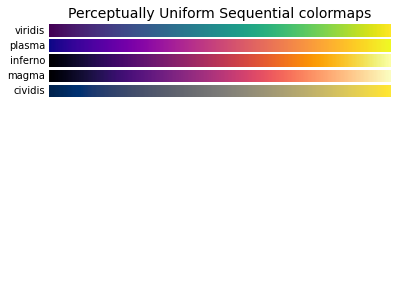

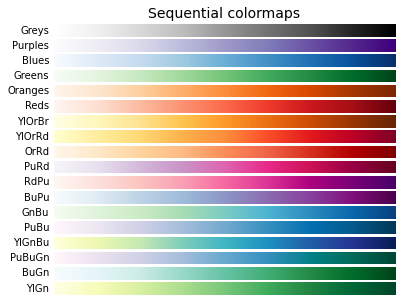

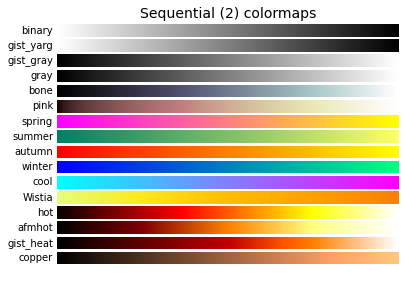

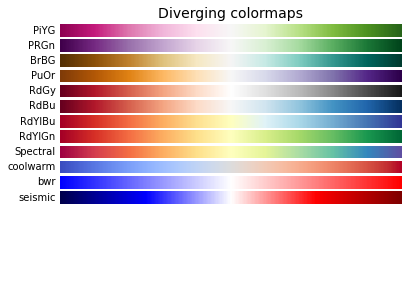

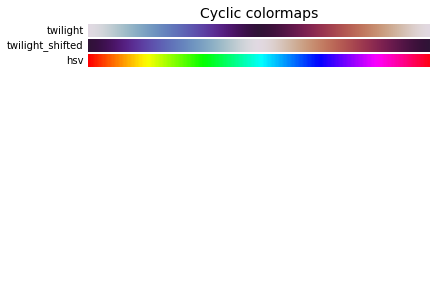

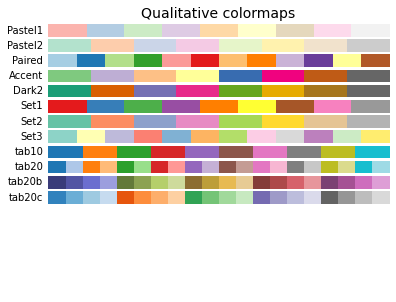

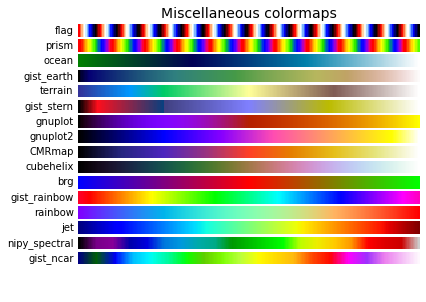

In [261]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()